<a href="https://colab.research.google.com/github/cfrisby/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [0]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [3]:
! curl -s $data_url | wc -l

306


In [0]:
df = pd.read_csv(data_url, header=None)

In [5]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.shape

(306, 4)

Per the UCI dataset description and the ! curl command results, I have the correct number of observations (306) in my dataframe.

In [7]:
# Check for missing values
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

No missing values.

In [0]:
# Rename the columns with more informative names
feature_names = {0:'patient_age', 1:'operation_year', 2:'positive_axillary_nodes', 3:'survival_status'}

In [9]:
df = df.rename(columns=feature_names)
df.head(10)

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [0]:
# Encode suvival status as 0 for not surviving 5 years and 1 for surviving 5 years
survival_dict = {1:1, 2:0}

In [11]:
df['survival_status'] = df['survival_status'].map(survival_dict)
df.head(10)

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

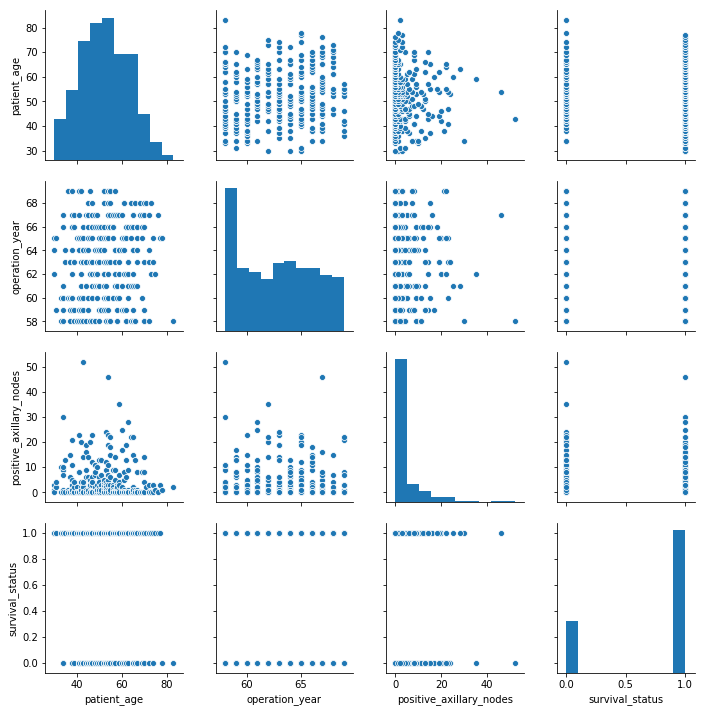

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [15]:
pd.set_option('display.max_columns', None)
df.groupby(df['survival_status']).describe()

patient_age                                                \
                      count       mean        std   min   25%   50%   75%   
survival_status                                                             
0                      81.0  53.679012  10.167137  34.0  46.0  53.0  61.0   
1                     225.0  52.017778  11.012154  30.0  43.0  52.0  60.0   

                      operation_year                                         \
                  max          count       mean       std   min   25%   50%   
survival_status                                                               
0                83.0           81.0  62.827160  3.342118  58.0  59.0  63.0   
1                77.0          225.0  62.862222  3.222915  58.0  60.0  63.0   

                            positive_axillary_nodes                           \
                  75%   max                   count      mean       std  min   
survival_status                                                                
0                65.0  69.0                    81.0  7.456790  9.185654  0.0   
1                66.0  69.0                   225.0  2.791111  5.870318  0.0   

                                       
                 25%  50%   75%   max  
survival_status                        
0                1.0  4.0  11.0  52.0  
1                0.0  0.0   3.0  46.0

In [16]:
# Investigate relationship between age and survival
age_bins = pd.cut(df['patient_age'], 10)
age_bins.value_counts()

(51.2, 56.5]      55
(45.9, 51.2]      53
(40.6, 45.9]      46
(61.8, 67.1]      41
(56.5, 61.8]      41
(35.3, 40.6]      27
(67.1, 72.4]      18
(29.947, 35.3]    16
(72.4, 77.7]       7
(77.7, 83.0]       2
Name: patient_age, dtype: int64

In [17]:
pd.crosstab(age_bins, df['survival_status'], normalize='index')

survival_status,0,1
patient_age,,
"(29.947, 35.3]",0.125000,0.875000
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


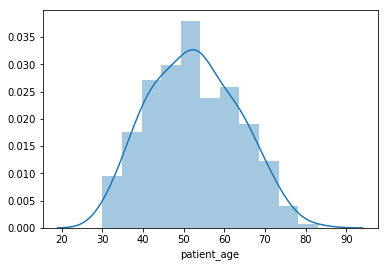

In [18]:
sns.distplot(df['patient_age'])
plt.show()

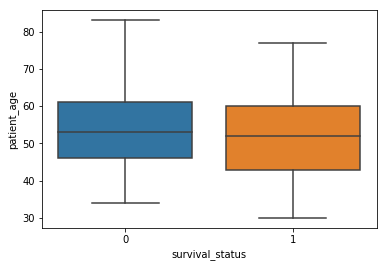

In [19]:
sns.boxplot(df['survival_status'], df['patient_age'])
plt.show()

In [20]:
# Investigate relationship between positive axillary nodes and survival
nodes_bins = pd.cut(df['positive_axillary_nodes'], bins=5)
nodes_bins.value_counts()

(-0.052, 10.4]    266
(10.4, 20.8]       26
(20.8, 31.2]       11
(41.6, 52.0]        2
(31.2, 41.6]        1
Name: positive_axillary_nodes, dtype: int64

In [21]:
pd.crosstab(nodes_bins, df['survival_status'], normalize='index')

survival_status,0,1
positive_axillary_nodes,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


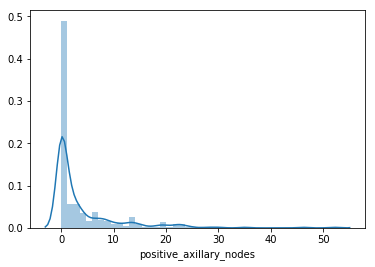

In [22]:
sns.distplot(df['positive_axillary_nodes'])
plt.show()

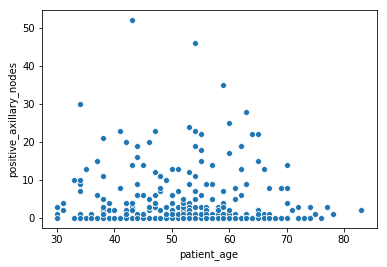

In [23]:
sns.scatterplot(df['patient_age'], df['positive_axillary_nodes'])
plt.show()

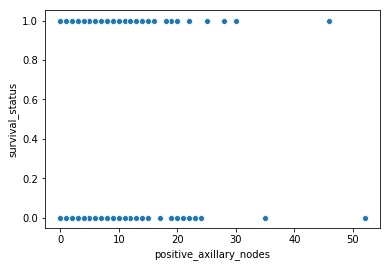

In [24]:
sns.scatterplot(df['positive_axillary_nodes'], df['survival_status'])
plt.show()

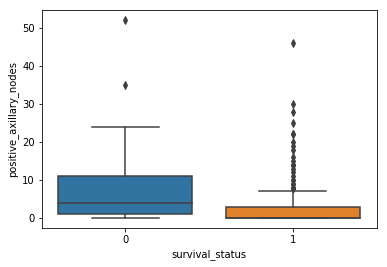

In [25]:
sns.boxplot(df['survival_status'], df['positive_axillary_nodes'])
plt.show()

In [26]:
# Investigate relationship between operation year and survival
year_bins = pd.cut(df['operation_year'], bins=10)
year_bins.value_counts()

(57.989, 59.1]    63
(63.5, 64.6]      31
(62.4, 63.5]      30
(65.7, 66.8]      28
(64.6, 65.7]      28
(59.1, 60.2]      28
(60.2, 61.3]      26
(66.8, 67.9]      25
(67.9, 69.0]      24
(61.3, 62.4]      23
Name: operation_year, dtype: int64

In [27]:
pd.crosstab(year_bins, df['survival_status'], normalize='index')

survival_status,0,1
operation_year,,
"(57.989, 59.1]",0.333333,0.666667
"(59.1, 60.2]",0.142857,0.857143
"(60.2, 61.3]",0.115385,0.884615
"(61.3, 62.4]",0.304348,0.695652
"(62.4, 63.5]",0.266667,0.733333
"(63.5, 64.6]",0.258065,0.741935
"(64.6, 65.7]",0.464286,0.535714
"(65.7, 66.8]",0.214286,0.785714
"(66.8, 67.9]",0.160000,0.840000


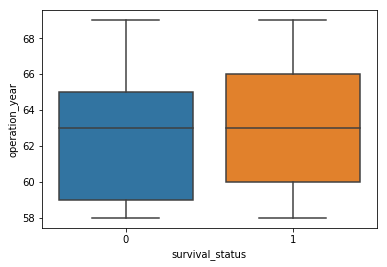

In [28]:
sns.boxplot(df['survival_status'], df['operation_year'])
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

***What is at least one feature that looks to have a positive relationship with survival?***

Short anwser: operation year

Long answer: continue reading

No features have an *obviously* positive relationship with survival.  Survival odds decrease as age increases, which would be considered a negative relationship.

If you just look at the scatter plot of positive axillary nodes detected versus survival status below, it appears that a positive correlation may exist, because the survival side of the graph appears to be more top-heavy. However, if you look at the historgram of observations (also shown below), it is clear that the vast majority of patients had fewer than 10 positive axillary nodes (and nearly half had 0). As shown in the table below, 78% of patients with fewer than 10 positive axillary nodes survived. In all groups with more than 10 positive axillary nodes found, the survival odds are greatly reduced. Thus, it cannot be said that the number of positive axillary nodes detected has a positive relationship with survival.

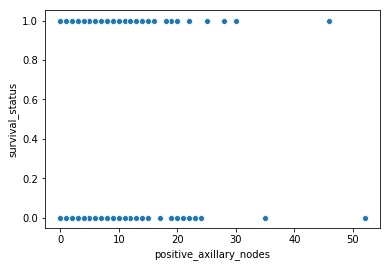

In [29]:
sns.scatterplot(df['positive_axillary_nodes'], df['survival_status'])
plt.show()

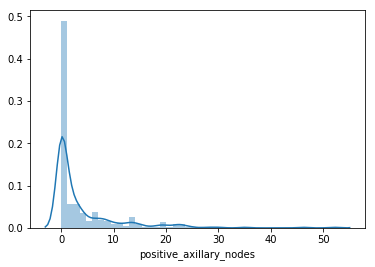

In [30]:
sns.distplot(df['positive_axillary_nodes'])
plt.show()

In [31]:
pd.crosstab(nodes_bins, df['survival_status'], normalize='index')

survival_status,0,1
positive_axillary_nodes,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


It does appear that operation year may have a slightly positive relationship with survival rate based on the box plot shown below. While the median operation year looks to be the same for patients who survied and patients who did not survive, the distribution of operation year skews towards higher for patients who survived. This could be due to increases in hospital technology, surgeon training, etc.

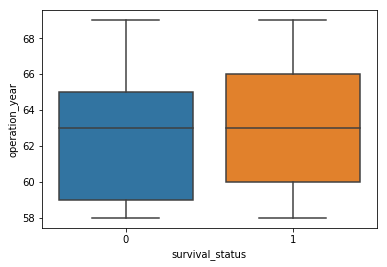

In [32]:
sns.boxplot(df['survival_status'], df['operation_year'])
plt.show()

***What is at least one feature that looks to have a negative relationship with survival?***

Age appears to have a negative relationship with survival (meaning that as age increases, survival odds decrease). As shown in the table below, ~91% of patients between 30-40 years survived for at least 5 years following surgery. All of the age groups above 40 years old had much lower survival rates (between 67-73%).

In [33]:
pd.crosstab(age_bins, df['survival_status'], normalize='index')

survival_status,0,1
patient_age,,
"(29.947, 35.3]",0.125000,0.875000
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


The number of positive axillary nodes found also seems to be negatively correlated with survival odds. As shown on the box plot below, those patients who had no positive axillary nodes had a great chance of survival. As the number of positive axillary nodes increases, however, the chances of survival decrease.

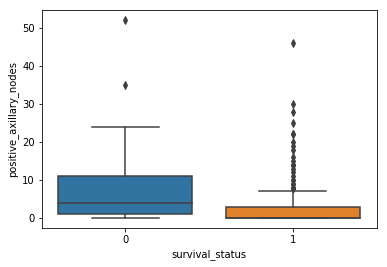

In [34]:
sns.boxplot(df['survival_status'], df['positive_axillary_nodes'])
plt.show()

***How are those two features related with each other, and what might that mean?***

There could be several reasons for why survival odds decrease as age increases. One possibility is that patients who are more advanced in age may have a more advanced form of breast cancer. These patients may have not kept up with regular doctor visits and therefore the cancer was discovered at a later stage, meaning a lower chance of survival. Another possibility is that older patients simply do not deal as well with the trauma of surgery and have a harder time recovering afterwards.

My assumption for why positive axillary nodes correlate negatively with survival is that this is a sign of the cancer potentially having spread to other parts of the body.